<a href="https://colab.research.google.com/github/Indongspace/Prophet_docs_study/blob/main/Prophet_docs_study(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prophet 공식문서 공부2

In [1]:
# 폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,151 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and dire

### Multiplicative Seasonality
By default Prophet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast. This time series of the number of air passengers is an example of when additive seasonality does not work:

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/0swrm_p1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/u1xj1uir.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86751', 'data', 'file=/tmp/tmpgub5egce/0swrm_p1.json', 'init=/tmp/tmpgub5egce/u1xj1uir.json', 'output', 'file=/tmp/tmpgub5egce/prophet_model75bsopdr/prophet_model-20240325001644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


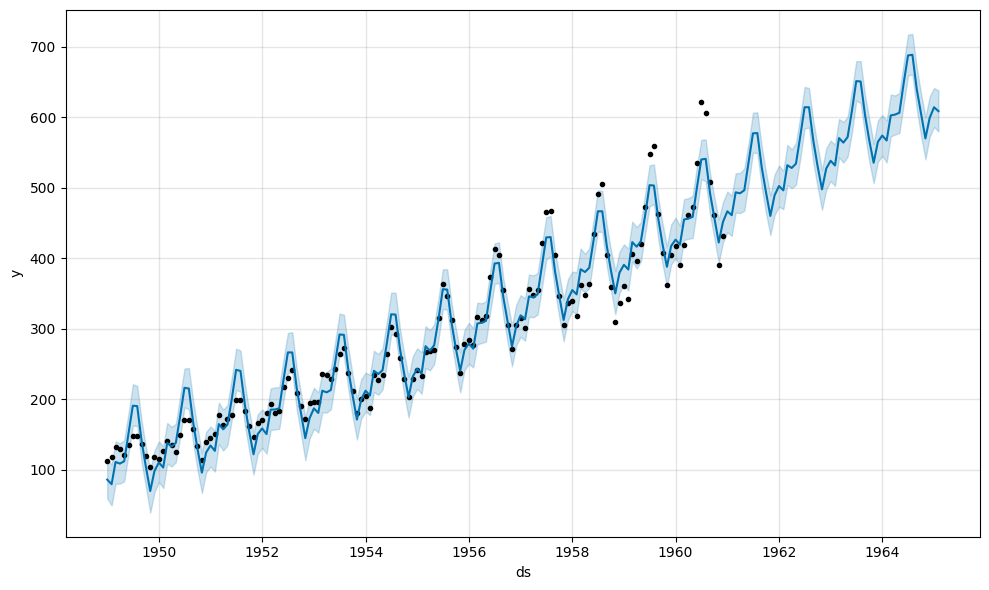

In [2]:
import pandas as pd
from prophet import Prophet

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

In [3]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,59.327364,114.612584,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,49.309209,107.364757,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,80.087435,140.233492,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,80.386960,137.471802,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,83.616794,141.853123,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1964-10-01,626.265457,573.735403,634.037729,621.669305,631.441010,-21.476004,-21.476004,-21.476004,-21.476004,-21.476004,-21.476004,0.0,0.0,0.0,604.789453
190,1964-11-01,629.397106,540.210486,600.034162,624.622060,634.759409,-59.460769,-59.460769,-59.460769,-59.460769,-59.460769,-59.460769,0.0,0.0,0.0,569.936336
191,1964-12-01,632.427734,572.232103,629.437980,627.510540,637.993444,-33.345930,-33.345930,-33.345930,-33.345930,-33.345930,-33.345930,0.0,0.0,0.0,599.081804
192,1965-01-01,635.559383,586.208478,641.405909,630.450316,641.316176,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,614.171928


### This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

Prophet can model multiplicative seasonality by setting seasonality_mode='multiplicative' in the input arguments:

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/u41q1ik9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/sc8gc2si.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80502', 'data', 'file=/tmp/tmpgub5egce/u41q1ik9.json', 'init=/tmp/tmpgub5egce/sc8gc2si.json', 'output', 'file=/tmp/tmpgub5egce/prophet_modelvnuw_0bb/prophet_model-20240325001644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


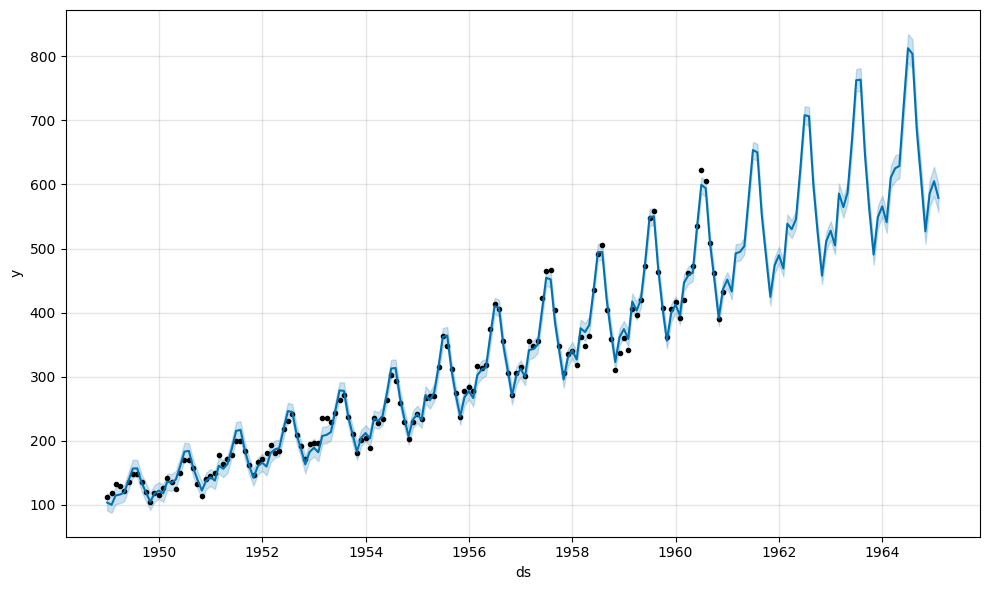

In [4]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

# The components figure will now show the seasonality as a percent of the trend:

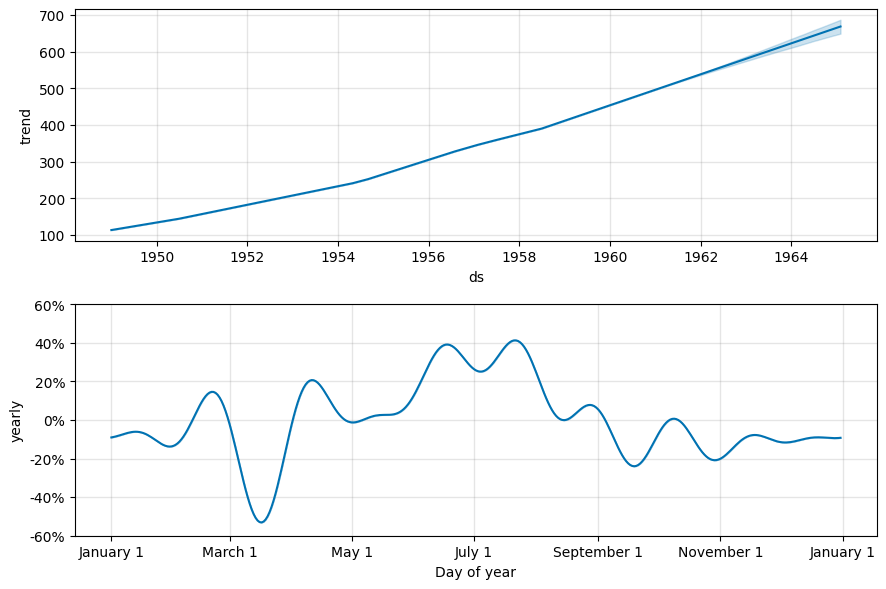

In [5]:
fig = m.plot_components(forecast)

### With seasonality_mode='multiplicative', holiday effects will also be modeled as multiplicative. Any added seasonalities or extra regressors will by default use whatever seasonality_mode is set to, but can be overriden by specifying mode='additive' or mode='multiplicative' as an argument when adding the seasonality or regressor.

For example, this block sets the built-in seasonalities to multiplicative, but includes an additive quarterly seasonality and an additive regressor:

In [6]:
m = Prophet(seasonality_mode='multiplicative')
m.add_seasonality('quarterly',period=91.25,fourier_order=8,mode='additive')
m.add_regressor('regressor',mode='additive')


### Additive and multiplicative extra regressors will show up in separate panels on the components plot. Note, however, that it is pretty unlikely to have a mix of additive and multiplicative seasonalities, so this will generally only be used if there is a reason to expect that to be the case.

### Uncertainty Intervals
By default Prophet will return uncertainty intervals for the forecast yhat. There are several important assumptions behind these uncertainty intervals.

There are three sources of uncertainty in the forecast: uncertainty in the trend, uncertainty in the seasonality estimates, and additional observation noise.

### Uncertainty in the trend
The biggest source of uncertainty in the forecast is the potential for future trend changes. The time series we have seen already in this documentation show clear trend changes in the history. Prophet is able to detect and fit these, but what trend changes should we expect moving forward? It’s impossible to know for sure, so we do the most reasonable thing we can, and we assume that the future will see similar trend changes as the history. In particular, we assume that the average frequency and magnitude of trend changes in the future will be the same as that which we observe in the history. We project these trend changes forward and by computing their distribution we obtain uncertainty intervals.

One property of this way of measuring uncertainty is that allowing higher flexibility in the rate, by increasing changepoint_prior_scale, will increase the forecast uncertainty. This is because if we model more rate changes in the history then we will expect more in the future, and makes the uncertainty intervals a useful indicator of overfitting.

The width of the uncertainty intervals (by default 80%) can be set using the parameter interval_width:

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/ygt1iwyw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/_1r_gbo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=579', 'data', 'file=/tmp/tmpgub5egce/ygt1iwyw.json', 'init=/tmp/tmpgub5egce/_1r_gbo1.json', 'output', 'file=/tmp/tmpgub5egce/prophet_model7agkuzxp/prophet_model-20240325001646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:16:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:16:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


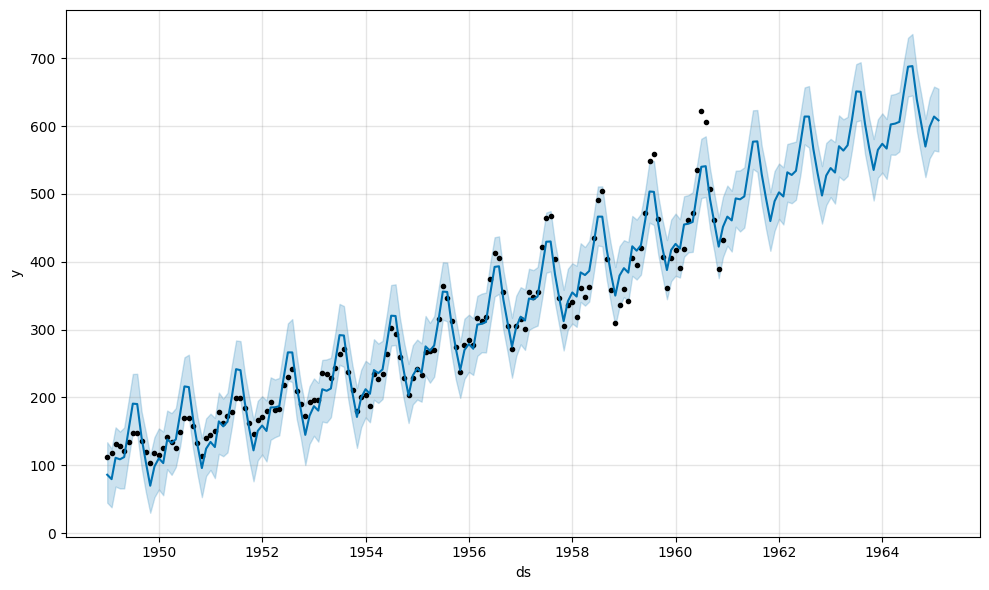

In [7]:
m = Prophet(interval_width=0.95)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

### Again, these intervals assume that the future will see the same frequency and magnitude of rate changes as the past. This assumption is probably not true, so you should not expect to get accurate coverage on these uncertainty intervals.

### Uncertainty in seasonality
By default Prophet will only return uncertainty in the trend and observation noise. To get uncertainty in seasonality, you must do full Bayesian sampling. This is done using the parameter mcmc.samples (which defaults to 0).:

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

In [9]:
m = Prophet(mcmc_samples=300)
m.fit(df,show_progress=False)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/wjtf206b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/gfc3adxi.json
00:16:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=98296', 'data', 'file=/tmp/tmpgub5egce/wjtf206b.json', 'init=/tmp/tmpgub5egce/gfc3adxi.json', 'output', 'file=/tmp/tmpgub5egce/prophet_model0ez0o4t8/prophet_model-20240325001647_1.csv', 'method=sample', 'num_samples=150', 'num_warmup=150', 'algorithm=hmc', 'adapt', 'engaged=1']
00:16:47 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:idx 1
INF

### This replaces the typical MAP estimation with MCMC sampling, and can take much longer depending on how many observations there are - expect several minutes instead of several seconds. If you do full sampling, then you will see the uncertainty in seasonal components when you plot them:

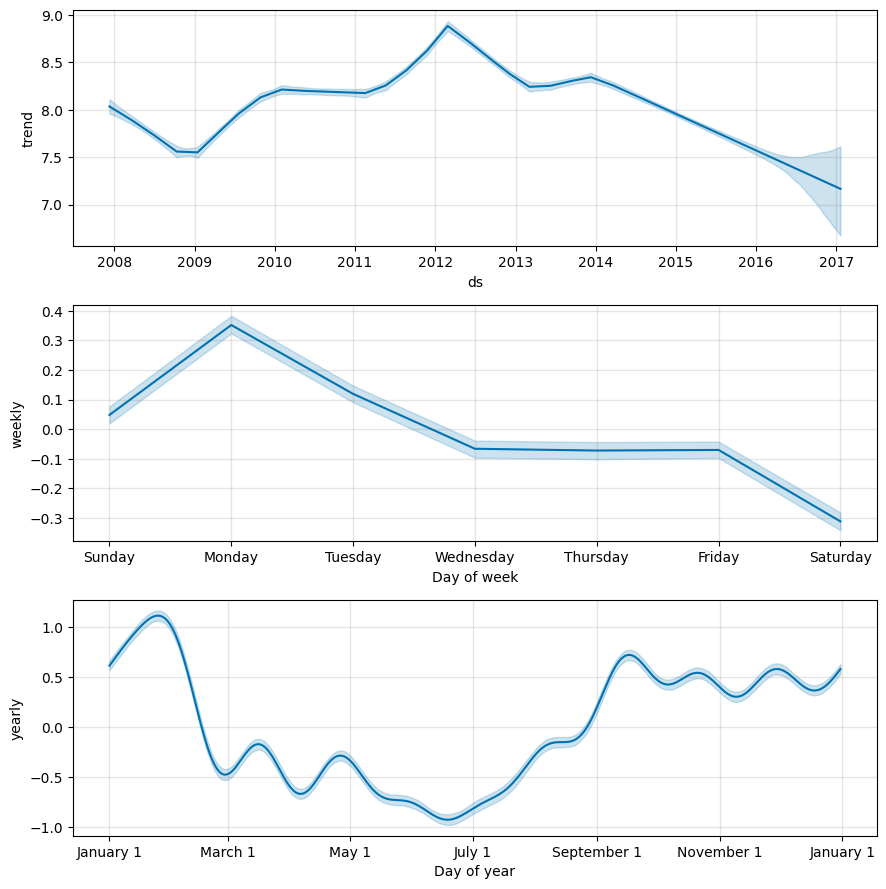

In [10]:
fig = m.plot_components(forecast)

### You can access the raw posterior predictive samples in Python using the method m.predictive_samples(future), or in R using the function predictive_samples(m, future).

### Outliers
There are two main ways that outliers can affect Prophet forecasts. Here we make a forecast on the logged Wikipedia visits to the R page from before, but with a block of bad data:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/6c6x43dn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/vy5ck_hm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44088', 'data', 'file=/tmp/tmpgub5egce/6c6x43dn.json', 'init=/tmp/tmpgub5egce/vy5ck_hm.json', 'output', 'file=/tmp/tmpgub5egce/prophet_modelyh43k6zd/prophet_model-20240325002515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


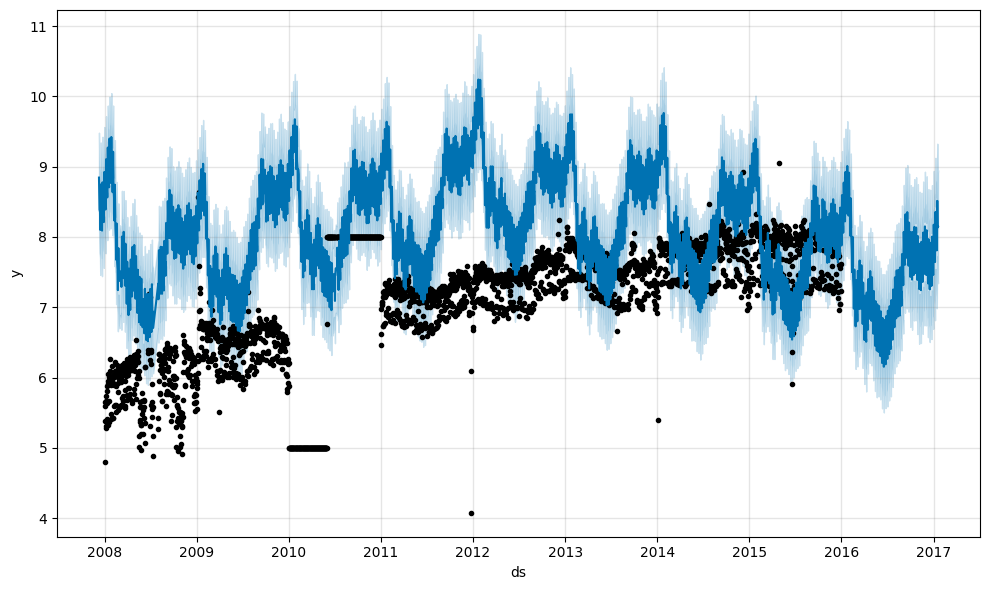

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers1.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast - m.predict(future)
fig = m.plot(forecast)

### The trend forecast seems reasonable, but the uncertainty intervals seem way too wide. Prophet is able to handle the outliers in the history, but only by fitting them with trend changes. The uncertainty model then expects future trend changes of similar magnitude.

The best way to handle outliers is to remove them - Prophet has no problem with missing data. If you set their values to NA in the history but leave the dates in future, then Prophet will give you a prediction for their values.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/hwu5jczi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/yvg_aeg4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4939', 'data', 'file=/tmp/tmpgub5egce/hwu5jczi.json', 'init=/tmp/tmpgub5egce/yvg_aeg4.json', 'output', 'file=/tmp/tmpgub5egce/prophet_modelhmxzhilq/prophet_model-20240325002519.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


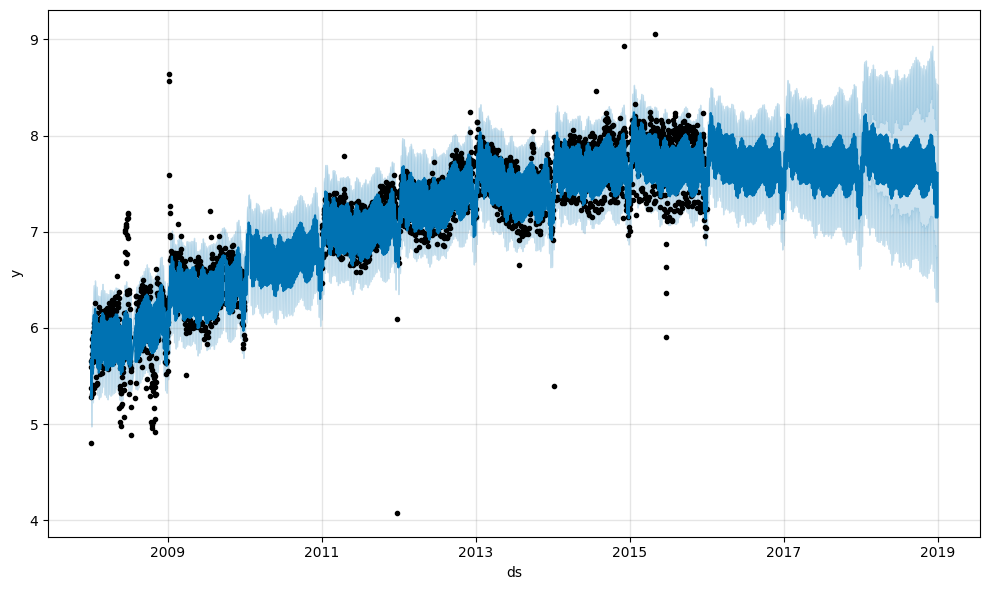

In [12]:
df.loc[(df['ds']>'2010-01-01')&(df['ds']<'2011-01-01'),'y'] = None
m = Prophet().fit(df)
fig = m.plot(m.predict(future))

### In the above example the outliers messed up the uncertainty estimation but did not impact the main forecast yhat. This isn’t always the case, as in this example with added outliers:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/_50djtk1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/_zqnwo5z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43153', 'data', 'file=/tmp/tmpgub5egce/_50djtk1.json', 'init=/tmp/tmpgub5egce/_zqnwo5z.json', 'output', 'file=/tmp/tmpgub5egce/prophet_modelhree_5em/prophet_model-20240325002521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


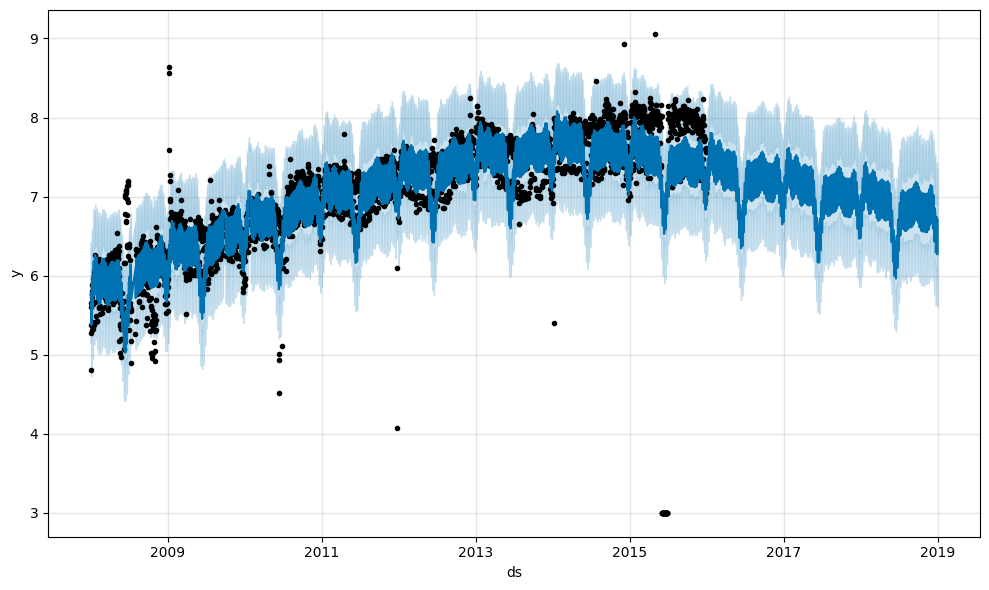

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers2.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
fig = m.plot(forecast)

### Here a group of extreme outliers in June 2015 mess up the seasonality estimate, so their effect reverberates into the future forever. Again the right approach is to remove them:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/fdr5dqag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/gurhwl5o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23998', 'data', 'file=/tmp/tmpgub5egce/fdr5dqag.json', 'init=/tmp/tmpgub5egce/gurhwl5o.json', 'output', 'file=/tmp/tmpgub5egce/prophet_model0h3b14pg/prophet_model-20240325002523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


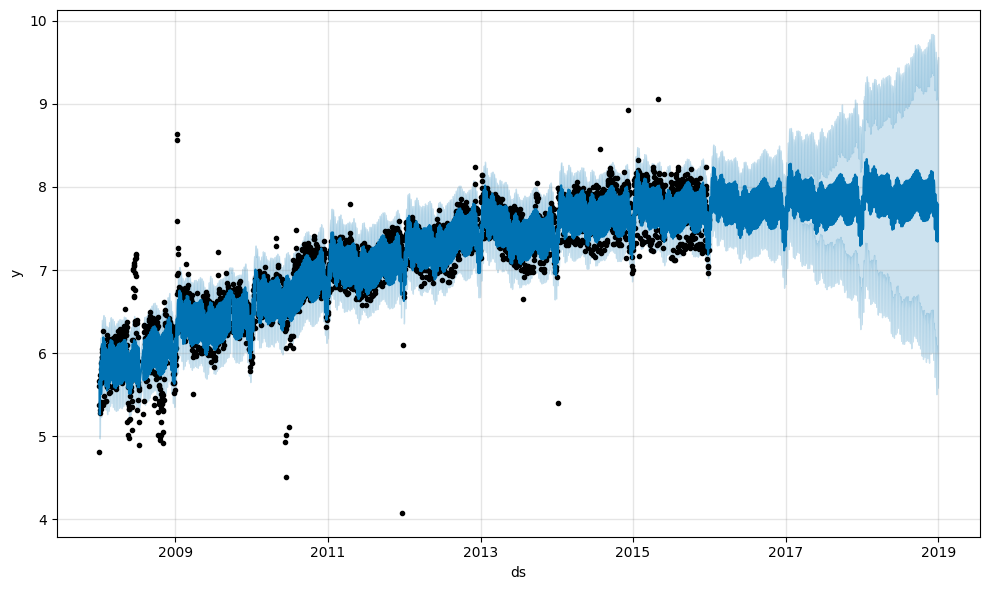

In [14]:
df.loc[(df['ds']>'2015-06-01')&(df['ds']<'2015-06-30'),'y'] = None
m = Prophet().fit(df)
fig = m.plot(m.predict(future))

###Non-Daily Data

Sub-daily data
Prophet can make forecasts for time series with sub-daily observations by passing in a dataframe with timestamps in the ds column. The format of the timestamps should be YYYY-MM-DD HH:MM:SS - see the example csv here. When sub-daily data are used, daily seasonality will automatically be fit. Here we fit Prophet to data with 5-minute resolution (daily temperatures at Yosemite):

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/71x808vb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/i96bu2f5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97063', 'data', 'file=/tmp/tmpgub5egce/71x808vb.json', 'init=/tmp/tmpgub5egce/i96bu2f5.json', 'output', 'file=/tmp/tmpgub5egce/prophet_model4ws5a7f_/prophet_model-20240325002527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


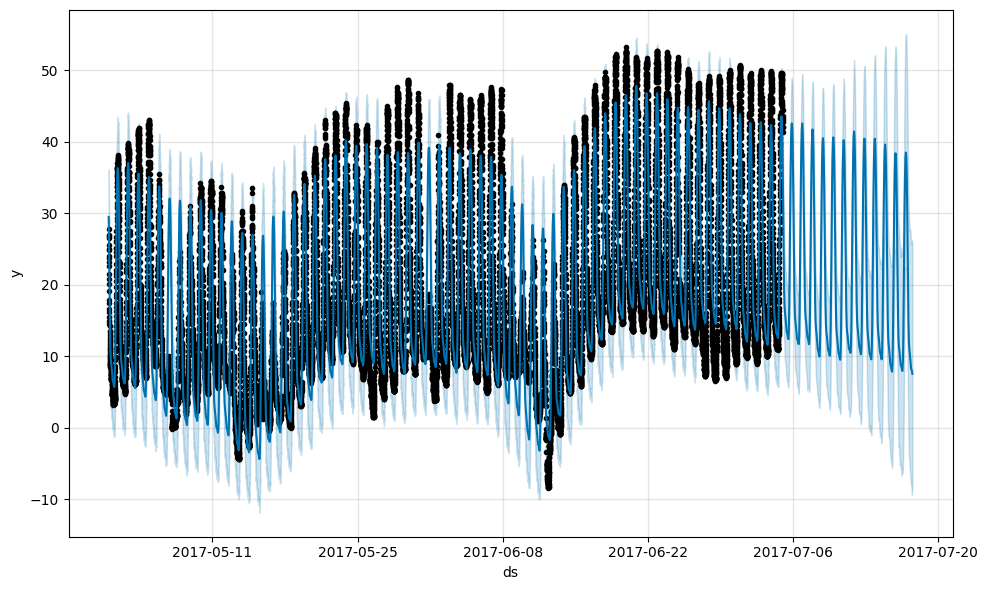

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_yosemite_temps.csv')
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300,freq='H')
forecast = m.predict(future)
fig = m.plot(forecast)

### The daily seasonality will show up in the components plot:

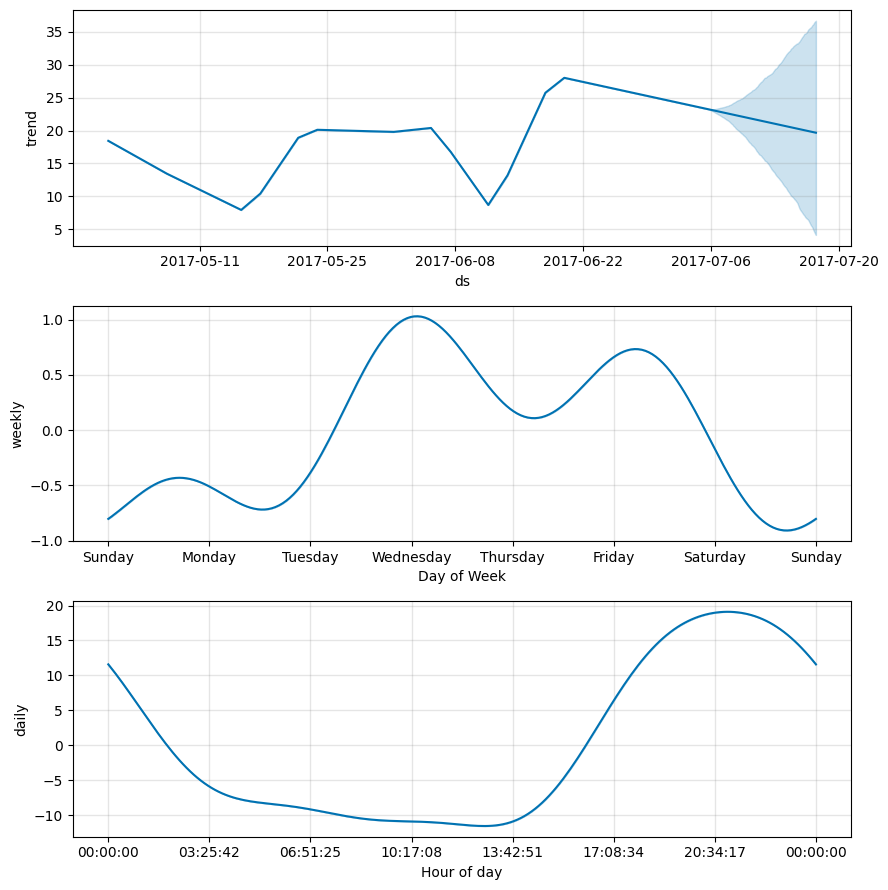

In [16]:
fig = m.plot_components(forecast)

### Data with regular gaps
Suppose the dataset above only had observations from 12a to 6a:

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/b1qa0f0f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/eac0fhfc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63511', 'data', 'file=/tmp/tmpgub5egce/b1qa0f0f.json', 'init=/tmp/tmpgub5egce/eac0fhfc.json', 'output', 'file=/tmp/tmpgub5egce/prophet_model3h1hlchq/prophet_model-20240325002537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


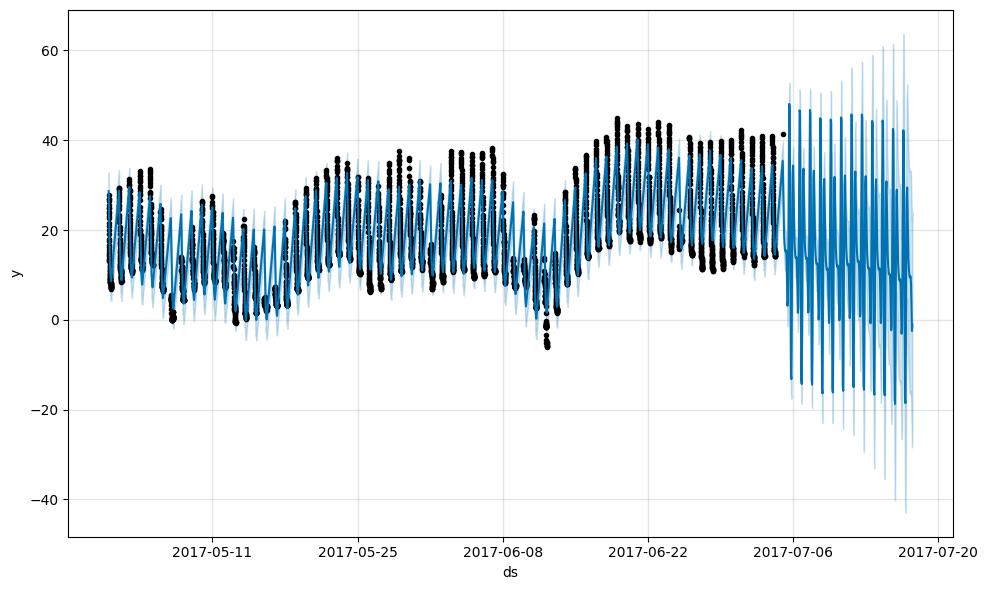

In [17]:
df2 = df.copy()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2[df2['ds'].dt.hour < 6]
m = Prophet().fit(df2)
future = m.make_future_dataframe(periods=300,freq='H')
forecast = m.predict(future)
fig = m.plot(forecast)

### The forecast seems quite poor, with much larger fluctuations in the future than were seen in the history. The issue here is that we have fit a daily cycle to a time series that only has data for part of the day (12a to 6a). The daily seasonality is thus unconstrained for the remainder of the day and is not estimated well. The solution is to only make predictions for the time windows for which there are historical data. Here, that means to limit the future dataframe to have times from 12a to 6a:

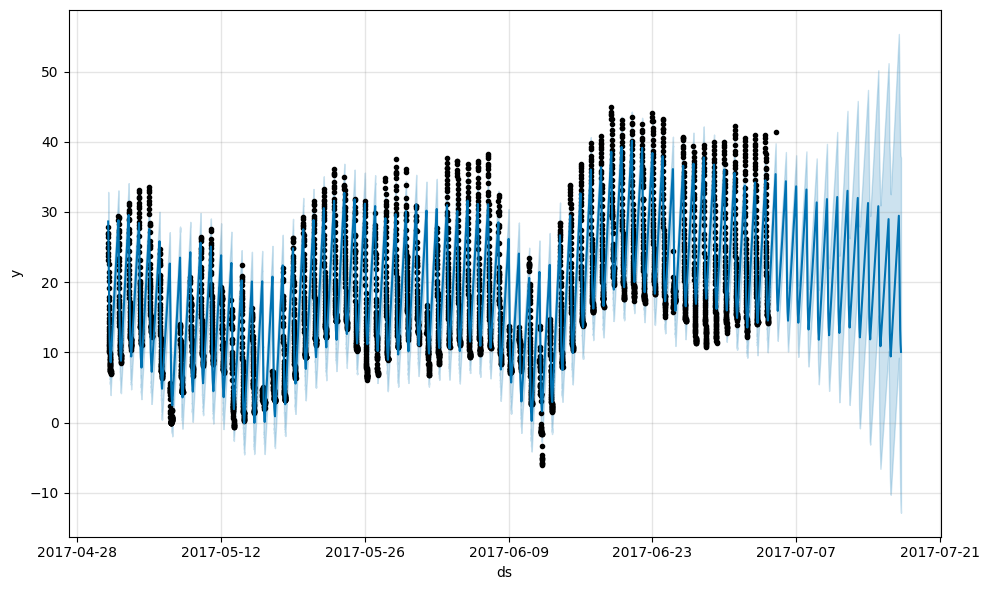

In [18]:
future2 = future.copy()
future2 = future2[future2['ds'].dt.hour < 6]
forecast = m.predict(future2)
fig = m.plot(forecast)

### The same principle applies to other datasets with regular gaps in the data. For example, if the history contains only weekdays, then predictions should only be made for weekdays since the weekly seasonality will not be well estimated for the weekends.

# Monthly data
### You can use Prophet to fit monthly data. However, the underlying model is continuous-time, which means that you can get strange results if you fit the model to monthly data and then ask for daily forecasts. Here we forecast US retail sales volume for the next 10 years:

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/l33kf85e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/1m7f6jah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35044', 'data', 'file=/tmp/tmpgub5egce/l33kf85e.json', 'init=/tmp/tmpgub5egce/1m7f6jah.json', 'output', 'file=/tmp/tmpgub5egce/prophet_modelbc0ca_vk/prophet_model-20240325002547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:25:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:25:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


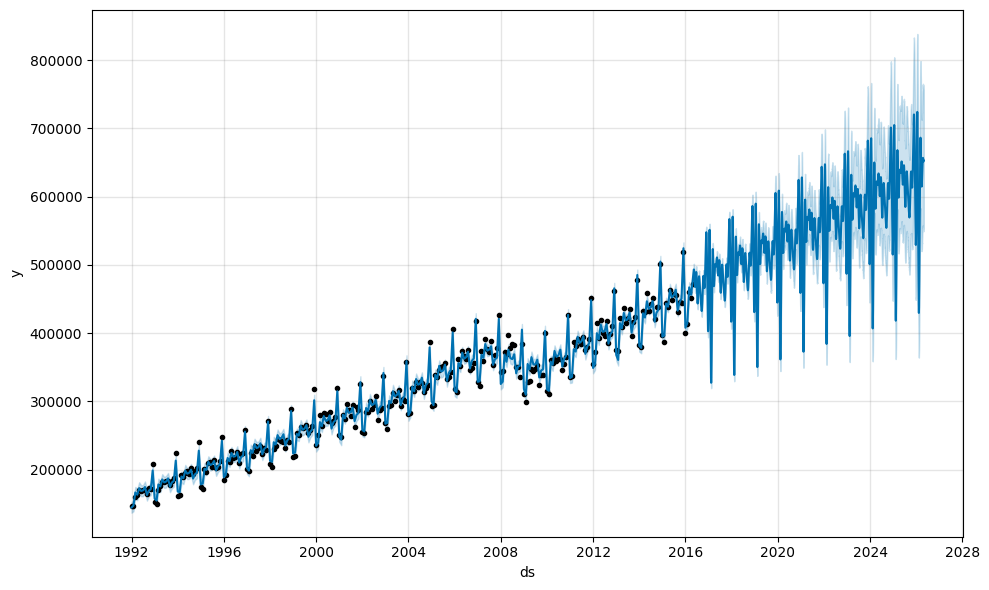

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_retail_sales.csv')
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

### This is the same issue from above where the dataset has regular gaps. When we fit the yearly seasonality, it only has data for the first of each month and the seasonality components for the remaining days are unidentifiable and overfit. This can be clearly seen by doing MCMC to see uncertainty in the seasonality:

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/bplsoosf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/8_4bsjzd.json
00:25:49 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=38995', 'data', 'file=/tmp/tmpgub5egce/bplsoosf.json', 'init=/tmp/tmpgub5egce/8_4bsjzd.json', 'output', 'file=/tmp/tmpgub5egce/prophet_modelog27w97c/prophet_model-20240325002549_2.csv', 'me

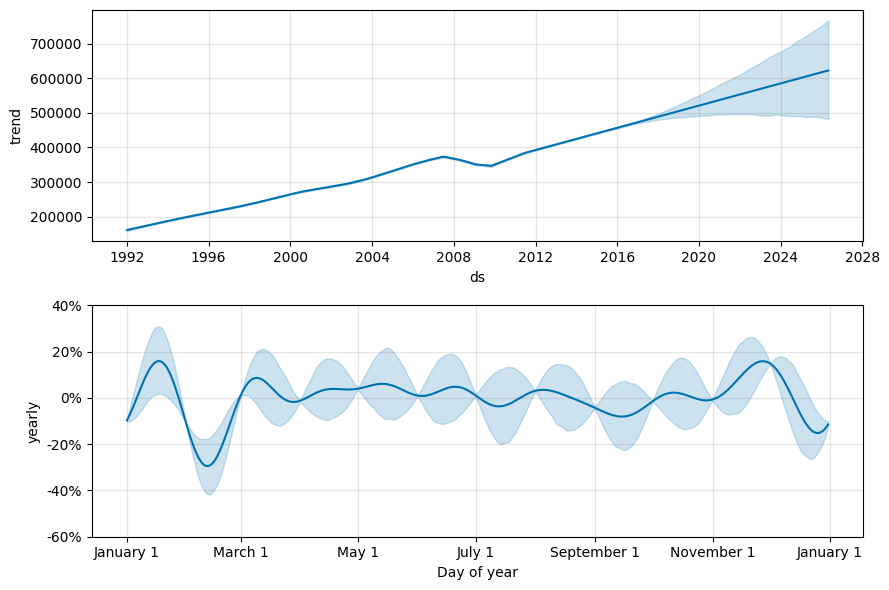

In [20]:
m = Prophet(seasonality_mode='multiplicative',mcmc_samples=300).fit(df,show_progress=False)
fcst = m.predict(future)
fig = m.plot_components(fcst)

### The seasonality has low uncertainty at the start of each month where there are data points, but has very high posterior variance in between. When fitting Prophet to monthly data, only make monthly forecasts, which can be done by passing the frequency into make_future_dataframe:

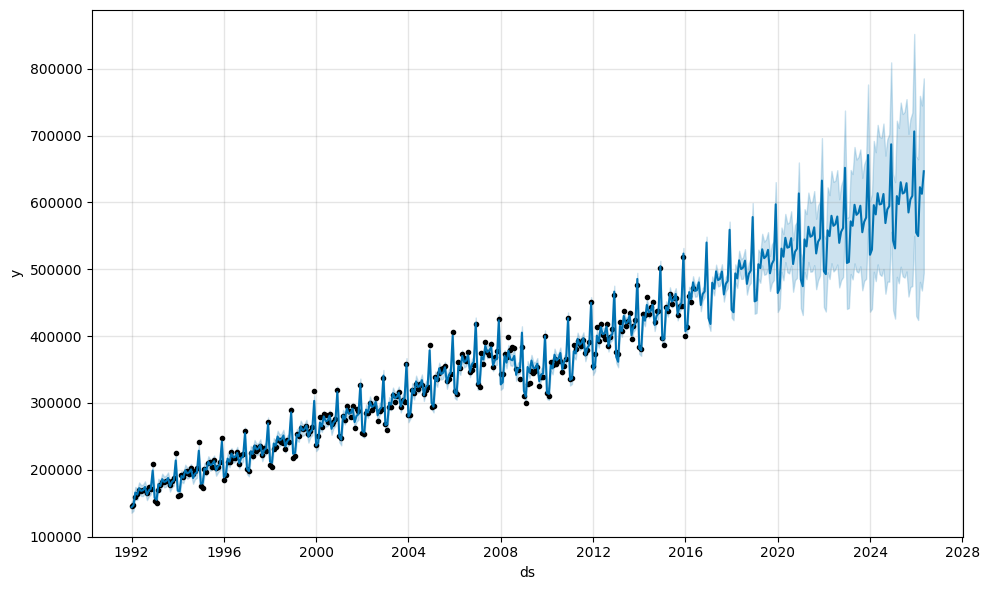

In [21]:
future = m.make_future_dataframe(periods=120,freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

### In Python, the frequency can be anything from the pandas list of frequency strings here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases . Note that MS used here is month-start, meaning the data point is placed on the start of each month.

### In monthly data, yearly seasonality can also be modeled with binary extra regressors. In particular, the model can use 12 extra regressors like is_jan, is_feb, etc. where is_jan is 1 if the date is in Jan and 0 otherwise. This approach would avoid the within-month unidentifiability seen above. Be sure to use yearly_seasonality=False if monthly extra regressors are being added.

### Holidays with aggregated data Holiday effects are applied to the particular date on which the holiday was specified. With data that has been aggregated to weekly or monthly frequency, holidays that don’t fall on the particular date used in the data will be ignored: for example, a Monday holiday in a weekly time series where each data point is on a Sunday. To include holiday effects in the model, the holiday will need to be moved to the date in the history dataframe for which the effect is desired. Note that with weekly or monthly aggregated data, many holiday effects will be well-captured by the yearly seasonality, so added holidays may only be necessary for holidays that occur in different weeks throughout the time series.

# Diagnostics

## Cross validation
### Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values. This figure illustrates a simulated historical forecast on the Peyton Manning dataset, where the model was fit to an initial history of 5 years, and a forecast was made on a one year horizon.

### The Prophet paper gives further description of simulated historical forecasts.

This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.

The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of yhat vs. y.

Here we do cross-validation to assess prediction performance on a horizon of 365 days, starting with 730 days of training data in the first cutoff and then making predictions every 180 days. On this 8 year time series, this corresponds to 11 total forecasts.

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

In [23]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/ceieyug5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/o7qfgn85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=250', 'data', 'file=/tmp/tmpgub5egce/ceieyug5.json', 'init=/tmp/tmpgub5egce/o7qfgn85.json', 'output', 'file=/tmp/tmpgub5egce/prophet_modelim6hzq1s/prophet_model-20240325002642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

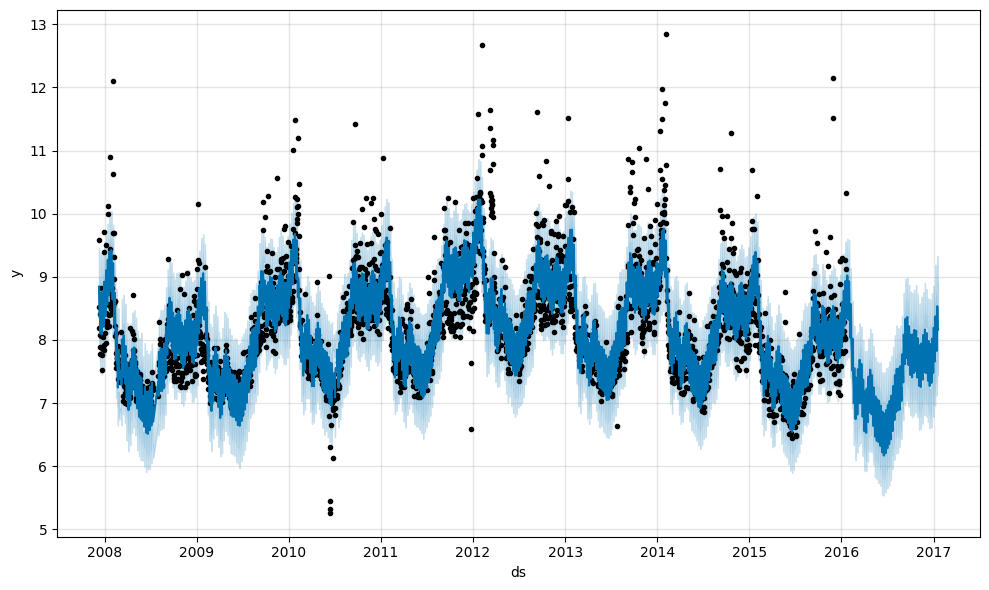

In [25]:
fig = m.plot(forecast)

In [26]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m,initial='730 days',period='180 days',horizon='365 days')
df_cv.head()

INFO:prophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/tu8k5lfz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/qm1qx4wy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44860', 'data', 'file=/tmp/tmpgub5egce/tu8k5lfz.json', 'init=/tmp/tmpgub5egce/qm1qx4wy.json', 'output', 'file=/tmp/tmpgub5egce/prophet_modelqfki36h7/prophet_model-20240325002644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:26:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/3avednf8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/qj42o_on.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/py

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.954582,8.427500,9.481648,8.242493,2010-02-15
1,2010-02-17,8.720932,8.217149,9.217663,8.008033,2010-02-15
2,2010-02-18,8.604608,8.097148,9.082264,8.045268,2010-02-15
3,2010-02-19,8.526379,7.983982,8.990270,7.928766,2010-02-15
4,2010-02-20,8.268247,7.779364,8.780714,7.745003,2010-02-15


### In Python, the string for initial, period, and horizon should be in the format used by Pandas Timedelta, which accepts units of days or shorter.   Custom cutoffs can also be supplied as a list of dates to the cutoffs keyword in the cross_validation function in Python and R. For example, three cutoffs six months apart, would need to be passed to the cutoffs argument in a date format like:

In [27]:
cutoffs = pd.to_datetime(['2013-02-15','2013-08-15','2014-02-15'])
df_cv2 = cross_validation(m,cutoffs=cutoffs,horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/b33hkrfq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/nwsul3fz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96907', 'data', 'file=/tmp/tmpgub5egce/b33hkrfq.json', 'init=/tmp/tmpgub5egce/nwsul3fz.json', 'output', 'file=/tmp/tmpgub5egce/prophet_modell7plsbog/prophet_model-20240325002652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:26:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:26:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/826swwef.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/3i8nnpxy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/py

### The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), median absolute percent error (MDAPE) and coverage of the yhat_lower and yhat_upper estimates. These are computed on a rolling window of the predictions in df_cv after sorting by horizon (ds minus cutoff). By default 10% of the predictions will be included in each window, but this can be changed with the rolling_window argument.

In [29]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.493358,0.702395,0.503977,0.058376,0.049365,0.058677,0.681590
1,38 days,0.499112,0.706478,0.508946,0.058951,0.049135,0.059312,0.680448
2,39 days,0.521344,0.722042,0.515016,0.059547,0.049225,0.060034,0.677707
3,40 days,0.528651,0.727084,0.517873,0.059852,0.049072,0.060409,0.678849
4,41 days,0.536149,0.732222,0.518843,0.059927,0.049135,0.060548,0.686386


### Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots. We see for this forecast that errors around 5% are typical for predictions one month into the future, and that errors increase up to around 11% for predictions that are a year out.

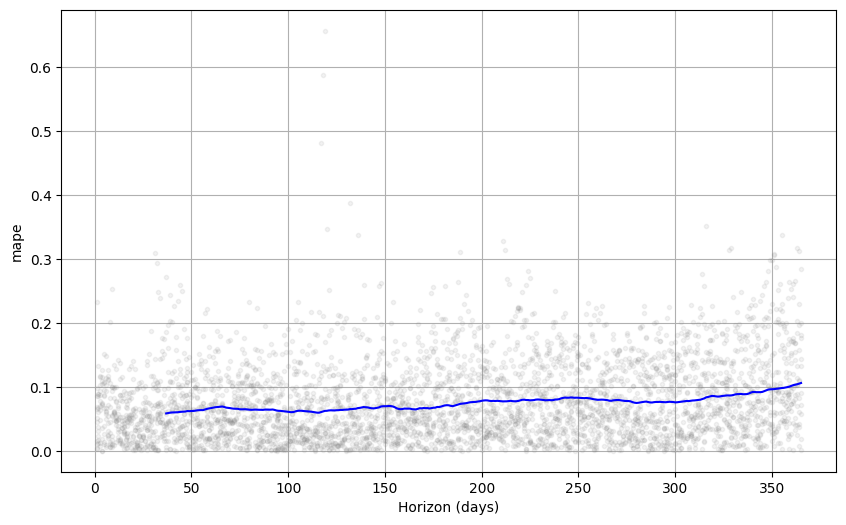

In [30]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='mape')

### The size of the rolling window in the figure can be changed with the optional argument rolling_window, which specifies the proportion of forecasts to use in each rolling window. The default is 0.1, corresponding to 10% of rows from df_cv included in each window; increasing this will lead to a smoother average curve in the figure. The initial period should be long enough to capture all of the components of the model, in particular seasonalities and extra regressors: at least a year for yearly seasonality, at least a week for weekly seasonality, etc.

### Parallelizing cross validation
Cross-validation can also be run in parallel mode in Python, by setting specifying the parallel keyword. Four modes are supported

parallel=None (Default, no parallelization)

parallel="processes"

parallel="threads"

parallel="dask"

For problems that aren’t too big, we recommend using parallel="processes". It will achieve the highest performance when the parallel cross validation can be done on a single machine. For large problems, a Dask cluster can be used to do the cross validation on many machines. You will need to install Dask separately, as it will not be installed with prophet.

In [31]:
from dask.distributed import Client

client = Client() #connect to the cluster
df_cv = cross_validation(m,initial='730 days',period='180 days',horizon='365 days',parallel='dask')

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:33013
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34457'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44243'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:38875', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38875
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:50874
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:33313', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33313
INFO:distributed.core:Sta

### Hyperparameter tuning
Cross-validation can be used for tuning hyperparameters of the model, such as changepoint_prior_scale and seasonality_prior_scale. A Python example is given below, with a 4x4 grid of those two parameters, with parallelization over cutoffs. Here parameters are evaluated on RMSE averaged over a 30-day horizon, but different performance metrics may be appropriate for different problems.

In [32]:
import itertools
import numpy as np
import pandas as pd

param_grid = {
    'changepoint_prior_scale' : [0.001,0.01,0.1,0.5],
    'seasonality_prior_scale' : [0.01,0.1,1.0,10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(),v)) for v in itertools.product(*param_grid.values())]
rmses = []

# use cross validation to evaluate all parameters
for params in all_params:
  m = Prophet(**params).fit(df) # fit model with given params
  df_cv = cross_validation(m,cutoffs=cutoffs,horizon='30 days',parallel='processes')
  df_p = performance_metrics(df_cv,rolling_window=1)
  rmses.append(df_p['rmse'].values[0])

# find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/p9re7vp5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgub5egce/xr952k6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96587', 'data', 'file=/tmp/tmpgub5egce/p9re7vp5.json', 'init=/tmp/tmpgub5egce/xr952k6b.json', 'output', 'file=/tmp/tmpgub5egce/prophet_model7ev1rojw/prophet_model-20240325004900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:49:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:49:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7821e69cb910>
DEBUG:cmdstanpy:input tempfile: 

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  0.754586
1                     0.001                     0.10  0.752845
2                     0.001                     1.00  0.753428
3                     0.001                    10.00  0.760194
4                     0.010                     0.01  0.546393
5                     0.010                     0.10  0.539256
6                     0.010                     1.00  0.525528
7                     0.010                    10.00  0.519574
8                     0.100                     0.01  0.525245
9                     0.100                     0.10  0.519843
10                    0.100                     1.00  0.520828
11                    0.100                    10.00  0.514431
12                    0.500                     0.01  0.529450
13                    0.500                     0.10  0.527707
14                    0.500                     1.00  0

In [33]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}


### Alternatively, parallelization could be done across parameter combinations by parallelizing the loop above.

### The Prophet model has a number of input parameters that one might consider tuning. Here are some general recommendations for hyperparameter tuning that may be a good starting place.

# Parameters that can be tuned

## changepoint_prior_scale
This is probably the most impactful parameter. It determines the flexibility of the trend, and in particular how much the trend changes at the trend changepoints. As described in this documentation, if it is too small, the trend will be underfit and variance that should have been modeled with trend changes will instead end up being handled with the noise term. If it is too large, the trend will overfit and in the most extreme case you can end up with the trend capturing yearly seasonality. The default of 0.05 works for many time series, but this could be tuned; a range of [0.001, 0.5] would likely be about right. Parameters like this (regularization penalties; this is effectively a lasso penalty) are often tuned on a log scale.

## seasonality_prior_scale
This parameter controls the flexibility of the seasonality. Similarly, a large value allows the seasonality to fit large fluctuations, a small value shrinks the magnitude of the seasonality. The default is 10., which applies basically no regularization. That is because we very rarely see overfitting here (there’s inherent regularization with the fact that it is being modeled with a truncated Fourier series, so it’s essentially low-pass filtered). A reasonable range for tuning it would probably be [0.01, 10]; when set to 0.01 you should find that the magnitude of seasonality is forced to be very small. This likely also makes sense on a log scale, since it is effectively an L2 penalty like in ridge regression.

## holidays_prior_scale
This controls flexibility to fit holiday effects. Similar to seasonality_prior_scale, it defaults to 10.0 which applies basically no regularization, since we usually have multiple observations of holidays and can do a good job of estimating their effects. This could also be tuned on a range of [0.01, 10] as with seasonality_prior_scale.


## seasonality_mode
Options are ['additive', 'multiplicative']. Default is 'additive', but many business time series will have multiplicative seasonality. This is best identified just from looking at the time series and seeing if the magnitude of seasonal fluctuations grows with the magnitude of the time series (see the documentation here on multiplicative seasonality), but when that isn’t possible, it could be tuned.

# Maybe tune?

## changepoint_range
This is the proportion of the history in which the trend is allowed to change. This defaults to 0.8, 80% of the history, meaning the model will not fit any trend changes in the last 20% of the time series. This is fairly conservative, to avoid overfitting to trend changes at the very end of the time series where there isn’t enough runway left to fit it well. With a human in the loop, this is something that can be identified pretty easily visually: one can pretty clearly see if the forecast is doing a bad job in the last 20%. In a fully-automated setting, it may be beneficial to be less conservative. It likely will not be possible to tune this parameter effectively with cross validation over cutoffs as described above. The ability of the model to generalize from a trend change in the last 10% of the time series will be hard to learn from looking at earlier cutoffs that may not have trend changes in the last 10%. So, this parameter is probably better not tuned, except perhaps over a large number of time series. In that setting, [0.8, 0.95] may be a reasonable range.

# Parameters that would likely not be tuned

## growth
Options are ‘linear’ and ‘logistic’. This likely will not be tuned; if there is a known saturating point and growth towards that point it will be included and the logistic trend will be used, otherwise it will be linear.

## changepoints
This is for manually specifying the locations of changepoints. None by default, which automatically places them.

## n_changepoints
This is the number of automatically placed changepoints. The default of 25 should be plenty to capture the trend changes in a typical time series (at least the type that Prophet would work well on anyway). Rather than increasing or decreasing the number of changepoints, it will likely be more effective to focus on increasing or decreasing the flexibility at those trend changes, which is done with changepoint_prior_scale.

## yearly_seasonality
By default (‘auto’) this will turn yearly seasonality on if there is a year of data, and off otherwise. Options are [‘auto’, True, False]. If there is more than a year of data, rather than trying to turn this off during HPO, it will likely be more effective to leave it on and turn down seasonal effects by tuning seasonality_prior_scale.

## weekly_seasonality
Same as for yearly_seasonality.

## daily_seasonality
Same as for yearly_seasonality.

## holidays
This is to pass in a dataframe of specified holidays. The holiday effects would be tuned with holidays_prior_scale.

## mcmc_samples
Whether or not MCMC is used will likely be determined by factors like the length of the time series and the importance of parameter uncertainty (these considerations are described in the documentation).

## interval_width
Prophet predict returns uncertainty intervals for each component, like yhat_lower and yhat_upper for the forecast yhat. These are computed as quantiles of the posterior predictive distribution, and interval_width specifies which quantiles to use. The default of 0.8 provides an 80% prediction interval. You could change that to 0.95 if you wanted a 95% interval. This will affect only the uncertainty interval, and will not change the forecast yhat at all and so does not need to be tuned.

## uncertainty_samples
The uncertainty intervals are computed as quantiles from the posterior predictive interval, and the posterior predictive interval is estimated with Monte Carlo sampling. This parameter is the number of samples to use (defaults to 1000). The running time for predict will be linear in this number. Making it smaller will increase the variance (Monte Carlo error) of the uncertainty interval, and making it larger will reduce that variance. So, if the uncertainty estimates seem jagged this could be increased to further smooth them out, but it likely will not need to be changed. As with interval_width, this parameter only affects the uncertainty intervals and changing it will not affect in any way the forecast yhat; it does not need to be tuned.